In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
titanic1 = sns.load_dataset('titanic')
titanic1.shape

(891, 15)

In [4]:
titanic=pd.read_csv('C:/Users/PJ-COMPUTERS/Downloads/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)   # inplace is true for change in original data

In [8]:
titanic.dropna(axis=1,inplace=True)
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [9]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['Sex', 'Embarked']:
    titanic[col] = label_encoder.fit_transform(titanic[col])

# Data visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

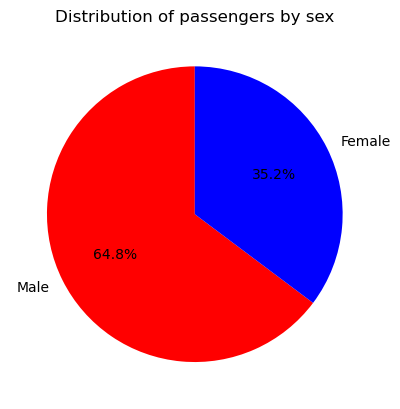

In [12]:
# Count plot
count=titanic['Sex'].value_counts()
y=["Male","Female"]
plt.pie(count,labels=y,autopct='%1.1f%%',startangle=90,colors=["red","blue"])
plt.title("Distribution of passengers by sex")
plt.show()

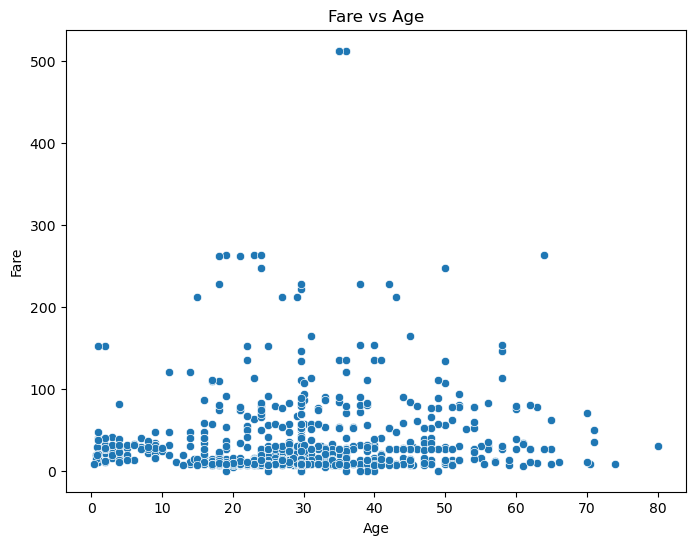

In [13]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic)
plt.title('Fare vs Age')
plt.show()

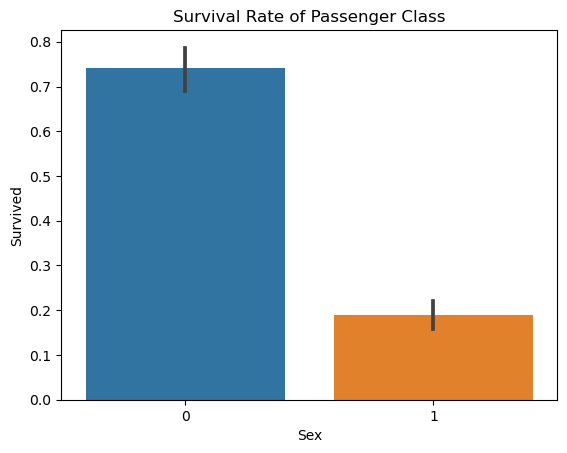

In [14]:
# Bar plot 
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate of Passenger Class')
plt.show()

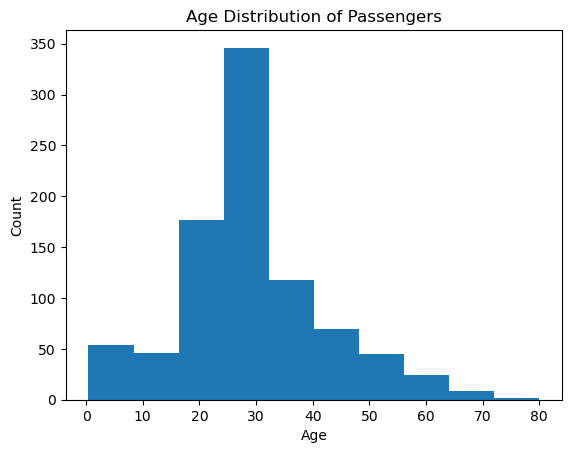

In [15]:
# histogram
plt.hist(titanic['Age'].dropna(), bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()

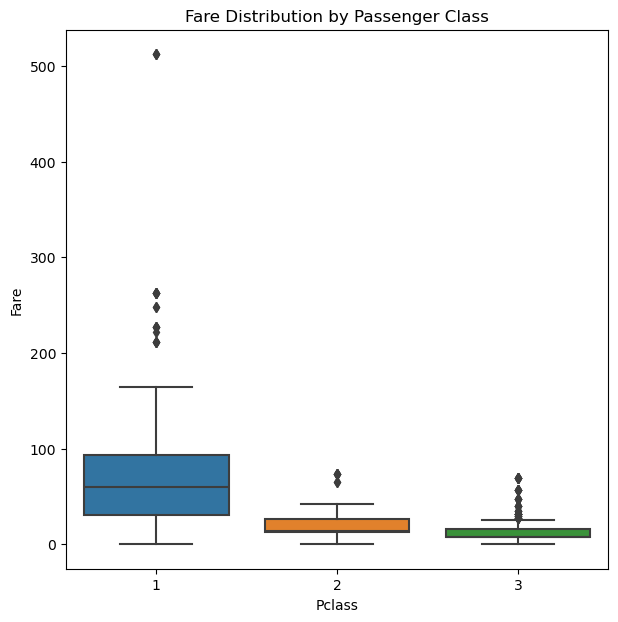

In [16]:
# Box plot 
plt.figure(figsize=(7,7))
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Fare Distribution by Passenger Class')
plt.show()

* Dependent and independent variables  
* Survive is a dependent variable.  
* Age,passenger class,Sex,SibSp,Parch,Fare ,Embarked are independent variables.  

In [19]:
y=titanic['Survived']                     # Target
x=titanic.drop(['Survived'], axis=1)     # Features

* splitting data into training and testing sets is to evaluate the performance of your machine learning modeldata is randomly split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.
* data is randomly split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.

In [20]:
# Splite data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=6)
print("Training set:", X_train.shape, "Target:", y_train.shape)
print("Testing set:", X_test.shape, "Target:", y_test.shape)

Training set: (712, 7) Target: (712,)
Testing set: (179, 7) Target: (179,)


# Naive bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Actual Value:", y_test)
print("Predicted Value:", predict)

Actual Value: 257    1
4      0
488    0
651    1
512    1
      ..
32     1
792    0
733    0
706    1
802    1
Name: Survived, Length: 179, dtype: int64
Predicted Value: [1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1]


In [55]:
# Accuracy
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,f1_score)
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
print("Accuracy:", accuray)

Accuracy: 0.8268156424581006


In [56]:
# classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:',class_report)

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.87      0.86       113
           1       0.77      0.76      0.76        66

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [57]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:",cm)

Confusion matrix: [[98 15]
 [16 50]]


# knn Algorithm

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Fitting the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [61]:
# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy1)

Accuracy: 0.7988826815642458


In [62]:
# classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:',class_report)

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.88      0.85       113
           1       0.77      0.65      0.70        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



Confusion Matrix: [[100  13]
 [ 23  43]]


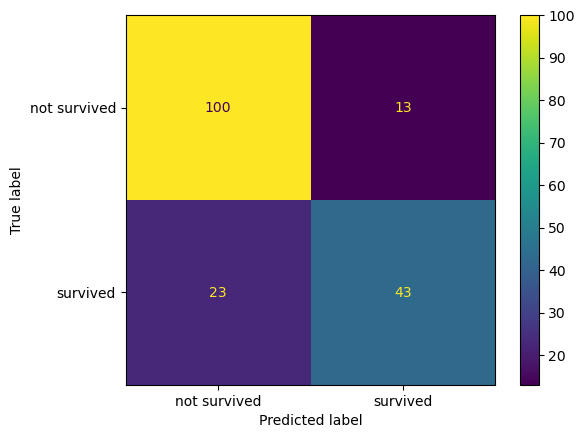

In [63]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:',conf_matrix)
cm_dis=ConfusionMatrixDisplay(conf_matrix,display_labels=["not survived","survived"])
cm_dis.plot()

# Decision Tree

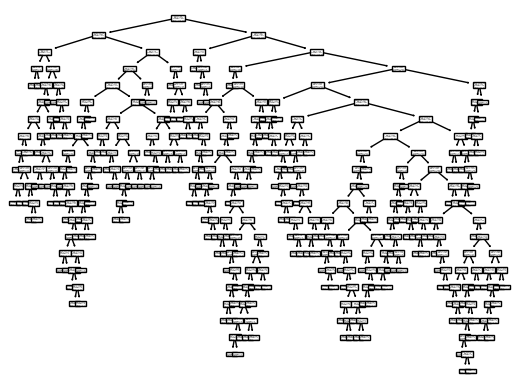

In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x= titanic[features]
y = titanic['Survived']
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)
tree.plot_tree(dtree, feature_names=features)
plt.show()

In [65]:
d_y_pred=dtree.predict(X_test)
d_y_pred

C:\Users\PJ-COMPUTERS\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [33]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, d_y_pred)
print('Accuracy:',accuracy_dt)

Accuracy: 0.3743016759776536


In [34]:
# classification report
class_report = classification_report(y_test, d_y_pred)
print('Classification Report:',class_report)

Classification Report:               precision    recall  f1-score   support

           0       0.53      0.07      0.12       113
           1       0.36      0.89      0.51        66

    accuracy                           0.37       179
   macro avg       0.45      0.48      0.32       179
weighted avg       0.47      0.37      0.27       179



Confusion Matrix: [[  8 105]
 [  7  59]]


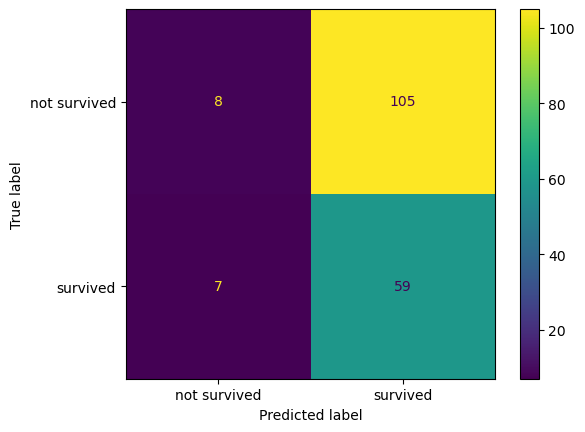

In [35]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, d_y_pred , labels=model.classes_)
print('Confusion Matrix:',conf_matrix)
cm_dis=ConfusionMatrixDisplay(conf_matrix,display_labels=["not survived","survived"])
cm_dis.plot()

# Comparision

In [47]:
import pandas as pd
from sklearn.metrics import precision_score , recall_score ,accuracy_score
models={'Naive Bayes':GaussianNB(),'k-Nearest Neighbours':KNeighborsClassifier(),'Decision tree':DecisionTreeClassifier()}

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
models = [ ('Naive Bayes', GaussianNB()), ('k-Nearest Neighbours', KNeighborsClassifier()),('Decision Tree', DecisionTreeClassifier())]
Res = []
for model_name, model in models:
    model.fit(X_train, y_train)
    predict_y = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict_y)
    precision = precision_score(y_test, predict_y)
    recall = recall_score(y_test, predict_y)
    Res.append({ "Model": model_name,"Accuracy": accuracy,"Precision": precision,"Recall": recall })
results = pd.DataFrame(Res)
results

,Model,Accuracy,Precision,Recall
0,Naive Bayes,0.826816,0.769231,0.757576
1,k-Nearest Neighbours,0.798883,0.767857,0.651515
2,Decision Tree,0.810056,0.750000,0.727273
